In [1]:
# initial setup
try:
    # settings colab:
    import google.colab
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed
nltk=3.4.5 already installed
unidecode=1.0.23 already installed
pydotplus=2.0.2 already installed


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [4]:
df_comercios = pd.read_csv('Data/COMERCIOS.csv', sep=',')
df_zonas = pd.read_csv('Data/zonas.csv', sep=';')

In [5]:
df_zonas.rename(columns={'MOC_ZONAS_ID':'ID_ZONA'}, inplace=True)

In [6]:
df = df_comercios.join(df_zonas, how='left', on='ID_ZONA', lsuffix='', rsuffix='_df2')

In [7]:
df.drop(columns=['ID_ZONA_df2', 'PK_TIEMPO_ID', 'FECHA', 'PERIODO'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_ZONA                                    26082 non-null  int64  
 1   RUBRO                                      26082 non-null  object 
 2   NIVEL_RIESGO                               26082 non-null  int64  
 3   APERTURAS                                  26082 non-null  float64
 4   CIERRES                                    26082 non-null  float64
 5   SUPERVIVENCIA                              21473 non-null  float64
 6   PROMEDIO_VENTAS                            26082 non-null  int64  
 7   CANTIDAD_LOCALES                           26082 non-null  int64  
 8   SUPERV_MENOS_1                             26082 non-null  float64
 9   SUPERV_ENTRE_1_Y_2                         26082 non-null  float64
 10  SUPERV_ENTRE_2_Y_3    

In [9]:
df.columns.values

array(['ID_ZONA', 'RUBRO', 'NIVEL_RIESGO', 'APERTURAS', 'CIERRES',
       'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES',
       'SUPERV_MENOS_1', 'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3',
       'SUPERV_ENTRE_3_Y_4', 'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5',
       'POBLACION_FLOTANTE', 'POBLACION_VIVIENTE',
       'POBLACION_TRABAJADORA', 'CANTIDAD_HOGARES',
       'PRECIO_PROMEDIO_ALQUILER_LOCAL', 'PRECIO_MAX_ALQUILER_LOCAL',
       'PRECIO_MIN_ALQUILER_LOCAL', 'SUPERFICIE_M2_PROMEDIO_ALQUILER',
       'SUPERFICIE_M2_MAX_ALQUILER', 'SUPERFICIE_M2_MIN_ALQUILER',
       'RUBRO_PREDOMINANTE', 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE',
       'RUBRO_MENOS_PREDOMINANTE', 'PRECIO_PROMEDIO_VENTA_LOCAL',
       'PRECIO_MAX_VENTA_LOCAL', 'PRECIO_MIN_VENTA_LOCAL',
       'SUPERFICIE_M2_PROMEDIO_VENTA', 'SUPERFICIE_M2_MAX_VENTA',
       'SUPERFICIE_M2_MIN_VENTA', 'NIVEL_LOCALES_RUBRO_PREDOMINANTE',
       'NIVEL_LOCALES_RUBRO_MENOS_PREDOMIN

In [10]:
df['ID_ZONA'] = df['ID_ZONA'].astype(str)

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20038 entries, 20 to 26063
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_ZONA                                    20038 non-null  object 
 1   RUBRO                                      20038 non-null  object 
 2   NIVEL_RIESGO                               20038 non-null  int64  
 3   APERTURAS                                  20038 non-null  float64
 4   CIERRES                                    20038 non-null  float64
 5   SUPERVIVENCIA                              20038 non-null  float64
 6   PROMEDIO_VENTAS                            20038 non-null  int64  
 7   CANTIDAD_LOCALES                           20038 non-null  int64  
 8   SUPERV_MENOS_1                             20038 non-null  float64
 9   SUPERV_ENTRE_1_Y_2                         20038 non-null  float64
 10  SUPERV_ENTRE_2_Y_3   

In [13]:
df['NIVEL_RIESGO'].value_counts()

1    7580
2    6862
3    4040
4    1361
5     195
Name: NIVEL_RIESGO, dtype: int64

In [14]:
df.loc[(df.NIVEL_RIESGO == 4) | (df.NIVEL_RIESGO == 5), 'NIVEL_RIESGO'] = 3

In [15]:
df['NIVEL_RIESGO'].value_counts()

1    7580
2    6862
3    5596
Name: NIVEL_RIESGO, dtype: int64

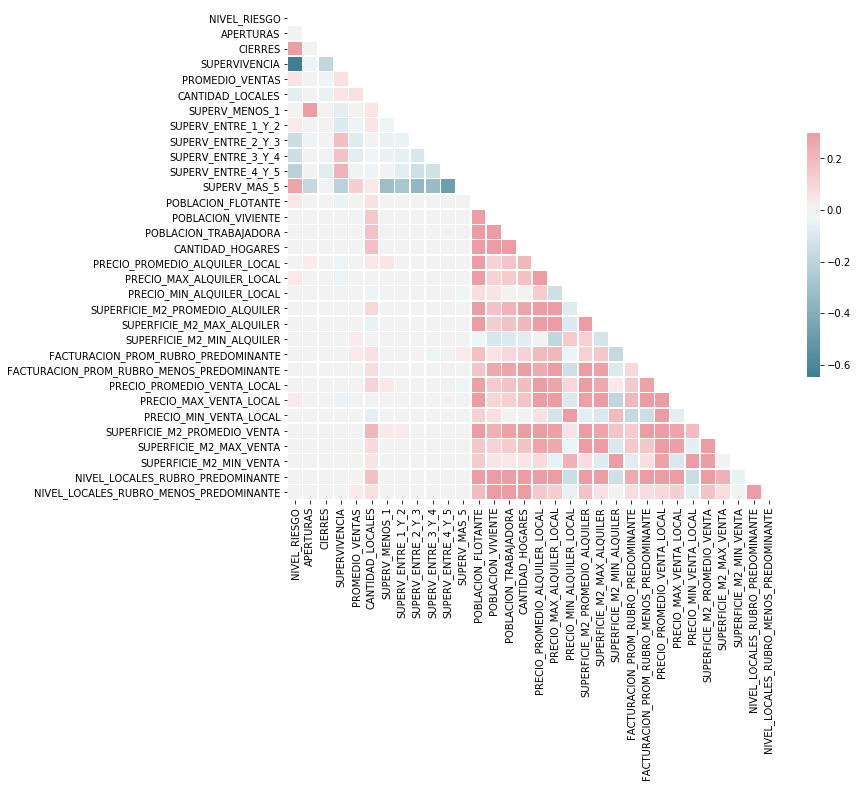

In [16]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

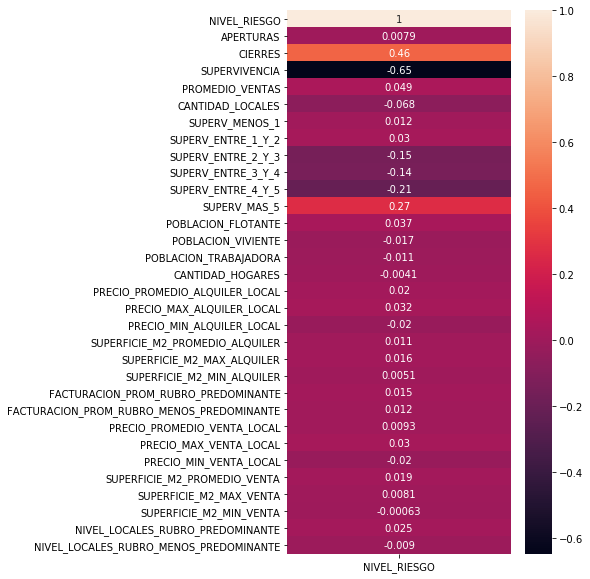

In [17]:
plt.figure(figsize=(5,10))
sns.heatmap(df.corr()[['NIVEL_RIESGO']], annot=True)

In [145]:
df['NR_STR'] = df['NIVEL_RIESGO'].astype(str)

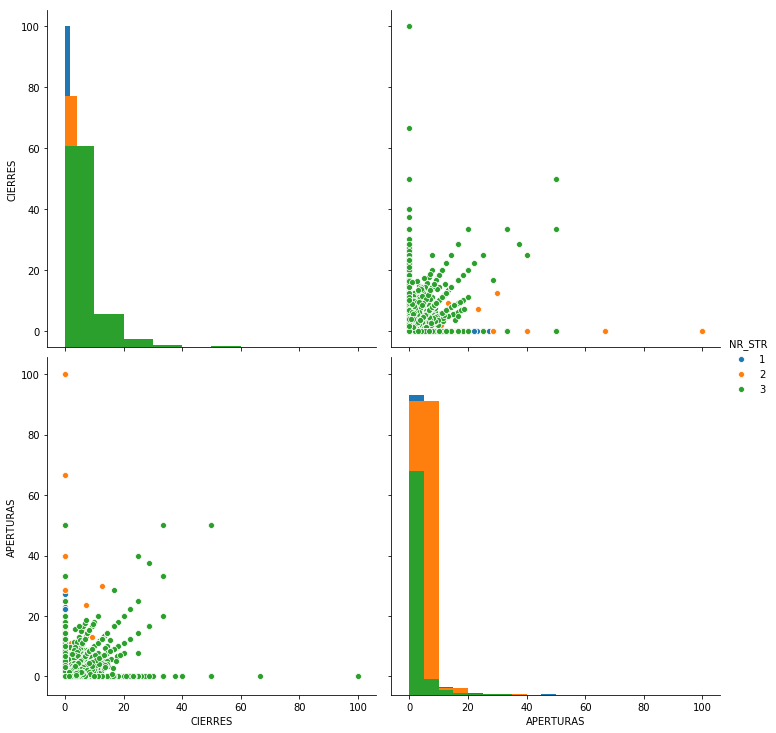

In [153]:
sns.pairplot(data=df[['CIERRES', 'APERTURAS', 'NR_STR']], vars=['CIERRES', 'APERTURAS'], hue='NR_STR', height=5, diag_kind='hist');

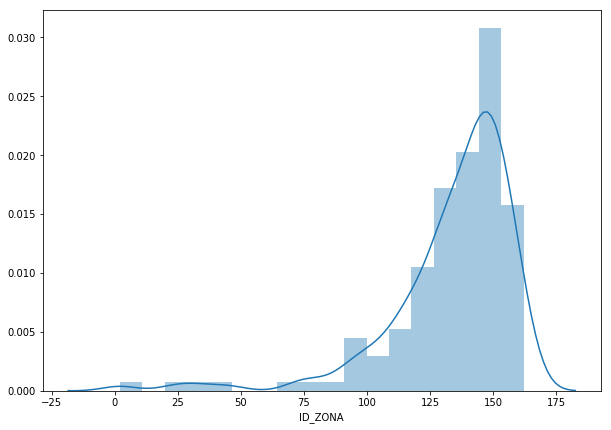

In [157]:
plt.figure(figsize=(10, 7))
sns.distplot(df['ID_ZONA'].value_counts())

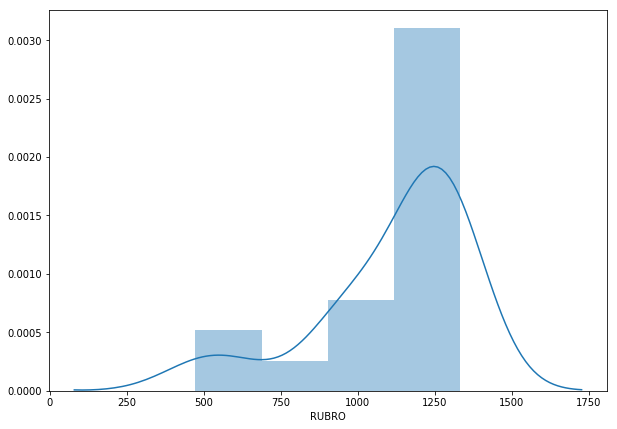

In [158]:
plt.figure(figsize=(10, 7))
sns.distplot(df['RUBRO'].value_counts())

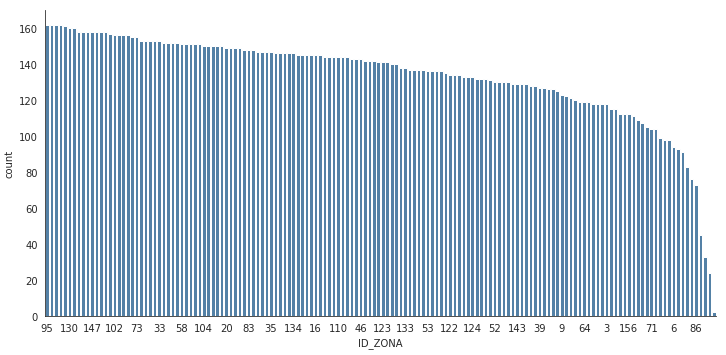

In [159]:
with sns.axes_style('white'):
    g = sns.catplot("ID_ZONA", data=df, aspect=2, kind="count", color='steelblue', order = df['ID_ZONA'].value_counts().index)
    g.set_xticklabels(step=5)

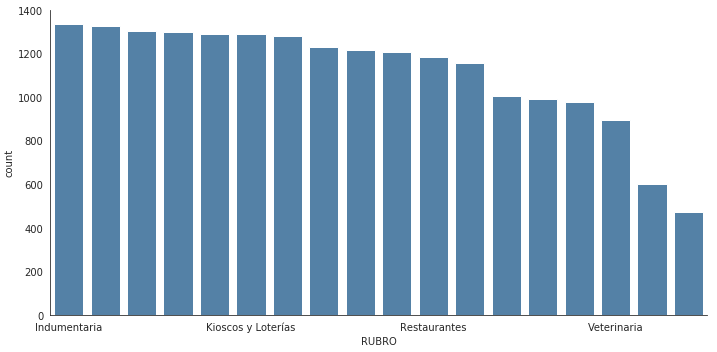

In [160]:
with sns.axes_style('white'):
    g = sns.catplot("RUBRO", data=df, aspect=2, kind="count", color='steelblue', order = df['RUBRO'].value_counts().index)
    g.set_xticklabels(step=5)

In [19]:
predecir = ['NIVEL_RIESGO']
features = ['ID_ZONA', 'RUBRO', 'APERTURAS', 'CIERRES',
       'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES',
       'POBLACION_FLOTANTE', 'POBLACION_VIVIENTE', 'POBLACION_TRABAJADORA',
       'CANTIDAD_HOGARES', 'PRECIO_PROMEDIO_ALQUILER_LOCAL',
       'PRECIO_MAX_ALQUILER_LOCAL', 'PRECIO_MIN_ALQUILER_LOCAL',
       'SUPERFICIE_M2_PROMEDIO_ALQUILER', 'SUPERFICIE_M2_MAX_ALQUILER',
       'SUPERFICIE_M2_MIN_ALQUILER', 'RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_PREDOMINANTE',
       'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE', 'RUBRO_MENOS_PREDOMINANTE',
       'PRECIO_PROMEDIO_VENTA_LOCAL', 'PRECIO_MAX_VENTA_LOCAL',
       'PRECIO_MIN_VENTA_LOCAL', 'SUPERFICIE_M2_PROMEDIO_VENTA',
       'SUPERFICIE_M2_MAX_VENTA', 'SUPERFICIE_M2_MIN_VENTA',
       'NIVEL_LOCALES_RUBRO_PREDOMINANTE',
       'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE']

In [20]:
# Creamos dummies
df_final = pd.get_dummies(df[features], columns=['ID_ZONA', 
                                                 'RUBRO', 
                                                 'RUBRO_PREDOMINANTE', 
                                                 'RUBRO_MENOS_PREDOMINANTE',
                                                 'FACTURACION_PROM_RUBRO_PREDOMINANTE',
                                                 'FACTURACION_PROM_RUBRO_MENOS_PREDOMINANTE',
                                                 'NIVEL_LOCALES_RUBRO_PREDOMINANTE', 
                                                 'NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE'], drop_first=True)

In [21]:
X = df_final
y = df[predecir]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [24]:
X_train.shape

(15028, 218)

In [25]:
y_train.shape

(15028, 1)

### LogisticRegression

In [123]:
logistic_regression = LogisticRegression(solver='newton-cg')

In [124]:
logistic_regression.fit(X_train_std, y_train.values.reshape(-1))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
y_pred_test = logistic_regression.predict(X_test_std)

In [126]:
accuracy_score(y_test, y_pred_test)

0.6508982035928144

In [34]:
y_test['NIVEL_RIESGO'].value_counts()

1    1895
2    1716
3    1399
Name: NIVEL_RIESGO, dtype: int64

Text(33,0.5,'Reales')

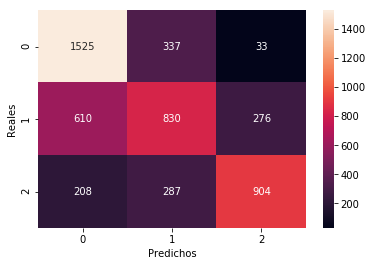

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [51]:
y_pred_proba_logit = logistic_regression.predict_proba(X_test_std)

In [52]:
y_pred_proba_logit.shape

(5010, 3)

In [37]:
#from sklearn.preprocessing import binarize
#y_pred_logit = binarize(y_pred_proba_logit, 0.3)[:,1]

In [53]:
#y_probs_logit_left = y_pred_proba_logit[:,1]
#y_pred_logit = y_probs_logit_left > 0.3

In [56]:
#sns.heatmap(confusion_matrix(y_test, y_pred_logit, ), annot=True, fmt='.0f')
#plt.xlabel('Predichos')
#plt.ylabel('Reales')

### KNeighborsClassifier

In [62]:
def scores_knn(X, y, start, stop, step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=3, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [63]:
df_scores_1= scores_knn(X_train_std, y_train.values.reshape(-1), 2, 6, 1)

In [64]:
df_scores_1

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.566476,0.002193,2,0.564283,0.568669
1,0.571467,0.003816,3,0.567650,0.575283
2,0.557626,0.002209,4,0.555416,0.559835
3,0.551438,0.004513,5,0.546924,0.555951


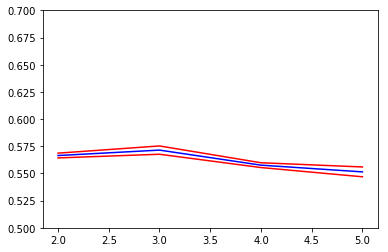

In [65]:
plt.plot(df_scores_1['n_neighbours'], df_scores_1['limite_inferior'], color='r')
plt.plot(df_scores_1['n_neighbours'], df_scores_1['score_medio'], color='b')
plt.plot(df_scores_1['n_neighbours'], df_scores_1['limite_superior'], color='r')
plt.ylim(0.5, 0.7);

In [66]:
df_scores_1.loc[df_scores_1.score_medio == df_scores_1.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
1,0.571467,0.003816,3,0.56765,0.575283


In [67]:
best_k_1 = df_scores_1.loc[df_scores_1.score_medio == df_scores_1.score_medio.max(),'n_neighbours'].values[0]
best_k_1

3

In [68]:
model_knn_1 = KNeighborsClassifier(n_neighbors=best_k_1)
model_knn_1.fit(X_train_std, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [69]:
accuracy_score(y_train, model_knn_1.predict(X_train_std))

0.7955815810487091

In [70]:
y_pred_knn_1 = model_knn_1.predict(X_test_std)

In [71]:
accuracy_score(y_test, y_pred_knn_1)

0.5998003992015968

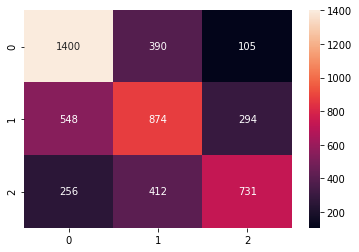

In [72]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_1), annot=True, fmt='.0f')

### PCA + KNClassifier

In [ ]:
#Veamos si mejora el score reduciendo dimensionalidad

In [74]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

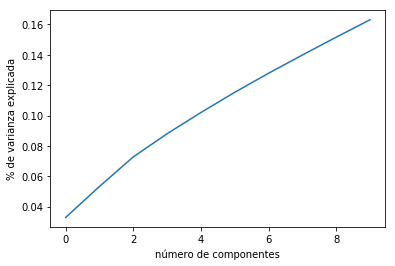

In [75]:
plot_explained_variance(components_count = 10, X = X_train_std)

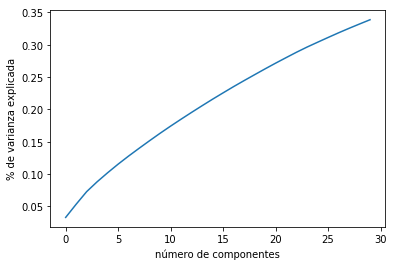

In [76]:
plot_explained_variance(components_count = 30, X = X_train_std)

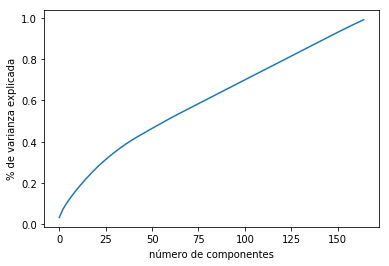

In [85]:
plot_explained_variance(components_count = 165, X = X_train_std)

In [86]:
model_pca = PCA(165).fit(X_train_std)
X_train_PCA = model_pca.transform(X_train_std)
X_test_PCA = model_pca.transform(X_test_std)

In [87]:
df_scores_2 = scores_knn(X_train_PCA, y_train.values.reshape(-1), 2, 6, 1)

In [88]:
df_scores_2

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.563681,0.004997,2,0.558685,0.568678
1,0.564613,0.004643,3,0.559970,0.569256
2,0.551837,0.002369,4,0.549468,0.554206
3,0.539327,0.005020,5,0.534307,0.544347


In [89]:
df_scores_2.loc[df_scores_2.score_medio == df_scores_2.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
1,0.564613,0.004643,3,0.55997,0.569256


In [91]:
best_k_2 = df_scores_2.loc[df_scores_2.score_medio == df_scores_2.score_medio.max(),'n_neighbours'].values[0]
best_k_2

3

In [92]:
model_knn_2 = KNeighborsClassifier(n_neighbors=best_k_2)
model_knn_2.fit(X_train_PCA, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [93]:
accuracy_score(y_train, model_knn_2.predict(X_train_PCA))

0.7913228639872238

In [94]:
y_pred_knn_2 = model_knn_2.predict(X_test_PCA)

In [95]:
accuracy_score(y_test, y_pred_knn_2)

0.6001996007984032

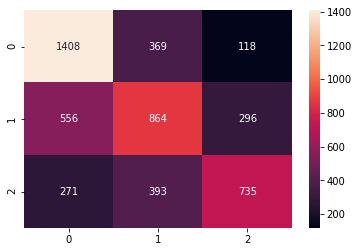

In [127]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_2), annot=True, fmt='.0f')

### PCA + NaiveBayes

In [97]:
gnb_1 = GaussianNB()
gnb_1.fit(X_train_std, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
y_pred_nb_train_1 = gnb_1.predict(X_train_std)

In [99]:
accuracy_score(y_train, y_pred_nb_train_1)

0.41522491349480967

In [100]:
y_pred_nb_1 = gnb_1.predict(X_test_std)

In [101]:
accuracy_score(y_test, y_pred_nb_1)

0.39600798403193616

In [102]:
gnb_2 = GaussianNB()
gnb_2.fit(X_train_PCA, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
y_pred_nb_train_2 = gnb_2.predict(X_train_PCA)

In [104]:
accuracy_score(y_train, y_pred_nb_train_2)

0.43771626297577854

In [105]:
y_pred_nb_2 = gnb_2.predict(X_test_PCA)

In [106]:
accuracy_score(y_test, y_pred_nb_2)

0.42574850299401196

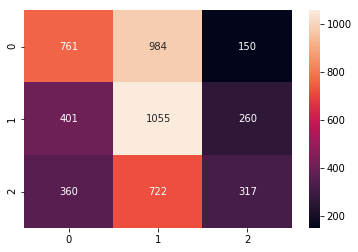

In [128]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb_2), annot=True, fmt='.0f')

###  PCA + KNRegressor

In [107]:
# instanciamos el modelo
knn_regressor = KNeighborsRegressor()

In [109]:
# armamos los parámetros para GridSearchCV
k_range = list(range(1, 5))
weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4], 'weights': ['uniform', 'distance']}


In [110]:
# importamos e instanciamos el GridSearchCV
folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(knn_regressor, param_grid, cv=folds)

In [111]:
# entrenamos el modelo
grid.fit(X_train_PCA, y_train.values.reshape(-1))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [112]:
display(grid.best_estimator_, grid.best_score_, grid.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='distance')

0.29377342375676346

{'n_neighbors': 4, 'weights': 'distance'}

In [113]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

y_pred_grid = grid.predict(X_test_PCA)

print('r2 = {}'.format(r2_score(y_test, y_pred_grid)))
print('MAE = {}'.format(mean_absolute_error(y_test, y_pred_grid)))
print('RMSD = {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_grid))))

r2 = 0.3563048054887389
MAE = 0.4391023021657776
RMSD = 0.6456863350242672


In [144]:
y_pred_grid

array([1.71526859, 2.        , 1.60209246, ..., 1.22609519, 2.16267287,
       1.21976492])

### PCA + REGRESION LOGISTICA

In [114]:
logistic_regression_2 = LogisticRegression(solver='newton-cg')

In [115]:
logistic_regression_2.fit(X_train_PCA, y_train.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred_test_2 = logistic_regression_2.predict(X_test_PCA)

In [118]:
accuracy_score(y_test, y_pred_test_2)

0.6465069860279441

### REGRESION LOGISTICA + GRID SEARCH

In [161]:
# penalty L1: Lasso y L2: Ridge
params_2 = [
    {'C': [1, 10, 100, 1000, 2000],
     'penalty': ['l1', 'l2',],
     'solver': ['newton-cg']}
]

grid_2 = GridSearchCV(LogisticRegression(), param_grid=params_2[0], cv=folds, n_jobs=2)
grid_2.fit(X_train_std, y_train.values.reshape(-1))
display(grid_2.best_estimator_, grid_2.best_score_, grid_2.best_params_)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

0.6376759071983598

{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [163]:
y_pred_grid_2 = grid_2.predict(X_test_std)

In [169]:
print (classification_report(y_test, y_pred_grid_2))

              precision    recall  f1-score   support

           1       0.65      0.80      0.72      1895
           2       0.57      0.48      0.52      1716
           3       0.74      0.65      0.69      1399

    accuracy                           0.65      5010
   macro avg       0.66      0.65      0.65      5010
weighted avg       0.65      0.65      0.65      5010



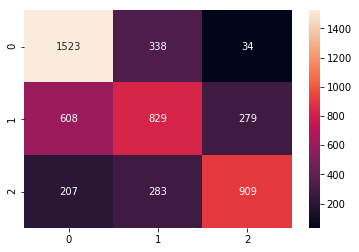

In [171]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_2), annot=True, fmt='.0f')